In [74]:
from skimage.filters import gabor_kernel
from skimage.transform import resize
import numpy as np
def gen_gabors(n_angles=16, sigmas=[2], freqs = [0.08, 0.16, 0.25, 0.32], kernel_resize = 10, kernel_crop = 7):
    kernels = []
    for sigma in sigmas:
        for frequency in freqs:
            for theta in range(n_angles):
                theta = theta / n_angles * np.pi
                kernel = np.real(gabor_kernel(frequency, theta=theta,
                sigma_x=sigma, sigma_y=sigma))
                kernel_size = kernel.shape[0]
                if kernel_size > kernel_resize:
                    kernel = resize(kernel, (kernel_resize, kernel_resize))
                    kernel_size = kernel.shape[0]
                else:
                    assert kernel_size >= kernel_crop
                    # center crop
                    size_delta = kernel_size - kernel_crop
                    kernel = kernel[size_delta//2:-(size_delta-size_delta//2),
                    size_delta//2:-(size_delta-size_delta//2)]
                kernels.append(kernel)
                return kernels

1


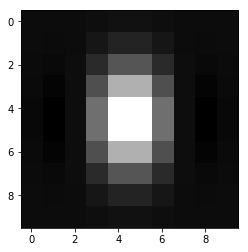

In [75]:
filters = gen_gabors()
print(len(filters))
pyplot.imshow(filters[0], cmap='gray')
#pyplot.imshow(filters[1], cmap='gray')
#pyplot.imshow(filters[2], cmap='gray')

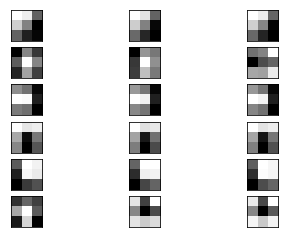

In [63]:
import keras
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
#model = keras.loadw
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

